In [110]:
import clingo
from clingraph import compute_graphs
from clingraph.orm import Factbase

In [111]:
instance1 = """

node(1).
node(2).
node(3).

edge((1,2)).
edge((1,3)).
edge((2,1)).
edge((2,3)).
edge((3,1)).
edge((3,2)).

edge_weight((1,2), 10).
edge_weight((2,3), 10).
edge_weight((3,1), 10).
edge_weight((2,1), 100).
edge_weight((3,2), 100).
edge_weight((1,3), 100).

attr(edge, E, label, W) :- edge(E), edge_weight(E, W).
attr(edge, E, dir, forward) :- edge(E).

attr(edge, E, color, red) :- edge(E), walk(E, T).
attr(edge, E, style, dotted) :- edge(E), not walk(E, _).

mintime(1).
maxtime(3).


"""

In [112]:
guess = """

1 { walk(E,I) : edge(E) } 1 :- mintime(I).
1 { walk(E,I+1) : edge(E) } 1 :- mintime(I).
{ walk(E,T) : edge(E) } 1 :- walk(_,T-1), maxtime(A), T<=A.

"""

In [113]:
filter = """

lasttime(L) :- walk(_,L), not walk(_,L+1).

:-                         edge((U,V)), walk((U,V), T), walk((V,W), T+1), not edge((V,W)).
:- mintime(I), lasttime(A), edge((U,V)), walk((U,V), A), walk((V,W),   I), not edge((V,W)).
:-                         walk((U,V),T), walk((W,X), T+1), V != W.
:- mintime(I), lasttime(A), walk((U,V),A), walk((W,X),   I), V != W.

:- mintime(I), not walk((1,_), I).

"""

In [114]:
show = """

#show walk/2.

"""

In [115]:
ctl = clingo.Control()
ctl.configuration.solve.models = 1
ctl.add("base", (), instance1)
ctl.add("base", (), guess)
ctl.add("base", (), filter)
ctl.add("base", (), show)

ctl.ground([("base", ())])
with ctl.solve(yield_=True) as solve_handle:
    solve_handle.get()
    model = solve_handle.model()
    print("Answer: ", ' '.join(map(str, sorted(model.symbols(shown=True)))))
    fb = Factbase()
    fb.add_model(model)

print(fb)

Answer:  walk((1,2),1) walk((2,3),2) walk((3,1),3)
edge((2,1),default).
edge((3,2),default).
edge((2,3),default).
edge((1,3),default).
edge((3,1),default).
edge((1,2),default).
node(3,default).
node(2,default).
node(1,default).
graph(default).
attr(edge,(1,3),(style,-1),dotted).
attr(edge,(2,3),(color,-1),red).
attr(edge,(2,1),(style,-1),dotted).
attr(edge,(1,2),(color,-1),red).
attr(edge,(3,1),(label,-1),10).
attr(edge,(2,1),(dir,-1),forward).
attr(edge,(3,2),(dir,-1),forward).
attr(edge,(3,1),(dir,-1),forward).
attr(edge,(1,2),(label,-1),10).
attr(edge,(2,1),(label,-1),100).
attr(edge,(2,3),(label,-1),10).
attr(edge,(2,3),(dir,-1),forward).
attr(edge,(3,1),(color,-1),red).
attr(edge,(3,2),(label,-1),100).
attr(edge,(3,2),(style,-1),dotted).
attr(edge,(1,2),(dir,-1),forward).
attr(edge,(1,3),(dir,-1),forward).
attr(edge,(1,3),(label,-1),100).



In [116]:
graphs = compute_graphs(fb)
graphs

{'default': <graphviz.graphs.Graph at 0x7efdfbf317b0>}

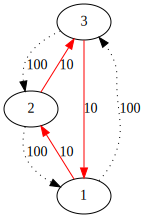

In [117]:
graphs['default']